<a href="https://colab.research.google.com/github/jinac/cv/blob/master/handart/HandTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

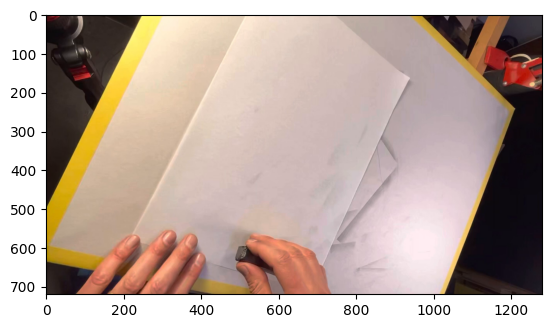

In [39]:
import cv2 # importing opencv-python
import numpy as np
from matplotlib import pyplot as plt

video_filepath = '0001.png'
frame = cv2.imread(video_filepath)
color_correct_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(color_correct_frame)

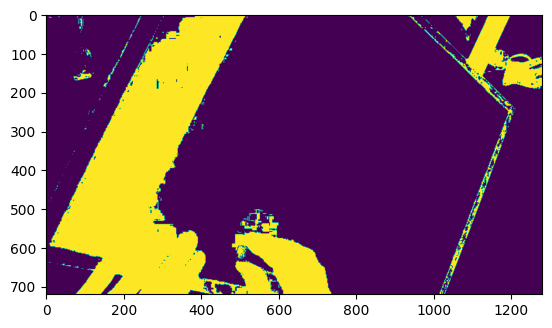

In [40]:
# intensities to be considered 'skin'
# These values can be tuned for the scene/video
lower = np.array([0, 48, 80], dtype = "uint8")
upper = np.array([20, 255, 255], dtype = "uint8")

# Mask out pixels that fit skin intensisties
converted = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
skinMask = cv2.inRange(converted, lower, upper)

# Show mask at this step
plt.imshow(skinMask)

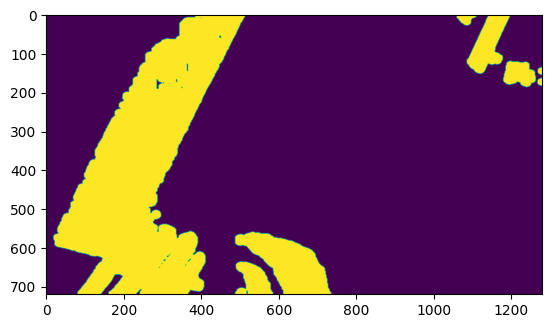

In [41]:
# Basically, do some filtering to clean up the mask

# apply a series of erosions and dilations to the mask
# using an elliptical kernel
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
skinMask = cv2.erode(skinMask, kernel, iterations = 2)
skinMask = cv2.dilate(skinMask, kernel, iterations = 2)
# blur the mask to help remove noise, then apply the
# mask to the frame
skinMask = cv2.GaussianBlur(skinMask, (3, 3), 0)

# Show mask after cleaning
plt.imshow(skinMask)

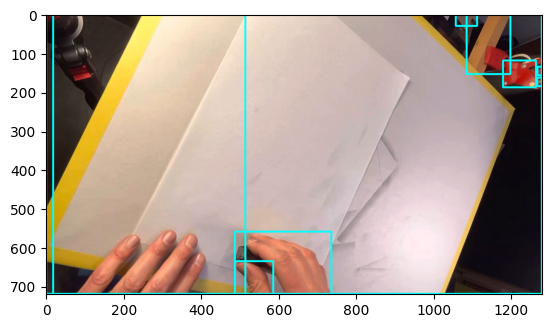

In [42]:
# Break down pixel 'blobs' into labelled objects
ret, img_label = cv2.connectedComponents(skinMask)
labels = np.unique(img_label)
boxes = []
for label in labels:
    y, x = np.where(img_label == label)  # row (y), col (x)
    min_y = np.min(y)
    min_x = np.min(x)
    max_y = np.max(y)
    max_x = np.max(x)
    # box_h_diff = np.abs(max_y - min_y)
    # box_w_diff = np.abs(max_x - min_x)
    boxes.append([min_x, min_y, max_x, max_y])

# Draw boxes around all objects.
box_frame = color_correct_frame.copy()
for bbox in boxes:
    box_frame = cv2.rectangle(box_frame, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (0, 255, 255), thickness=3)
plt.imshow(box_frame)

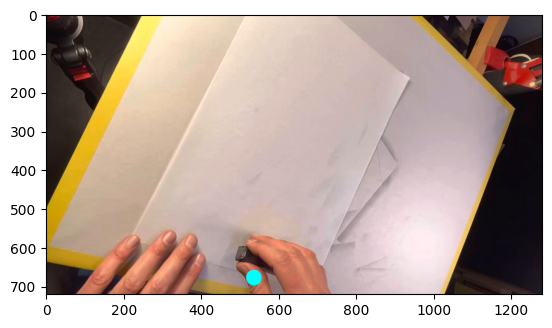

In [47]:
# Draw x, y center of each object as circle
object_center_frame = color_correct_frame.copy()
for bbox in boxes:
    x = int((bbox[0] + bbox[2]) / 2.)
    y = int((bbox[1] + bbox[3]) / 2.)
    object_center_frame = cv2.circle(object_center_frame, (x, y), 20, (0, 255, 255), thickness=-1)
plt.imshow(object_center_frame)

[487, 559, 736, 719]


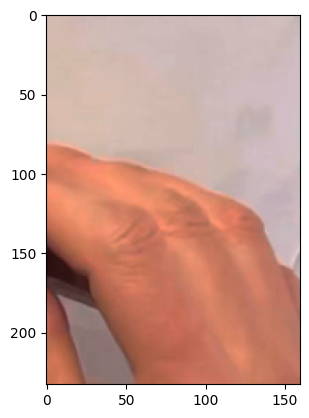

In [49]:
bbox = boxes[-2]
cropped_frame = color_correct_frame[bbox[0]:bbox[2], bbox[1]:bbox[3]]
plt.imshow(cropped_frame)